In [2]:
# from google.colab import drive
from datetime import datetime
import numpy as np
import warnings

# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

import pandas as pd
import matplotlib.pyplot as plt
import math
import mplfinance as mpf

In [16]:
# Load data
path = 'E:/stock-price-prediction/data/technology/SAM.csv'
df = pd.read_csv(path, index_col=6, delimiter='\t')
# Get training data (timely ordered since data is time-series)
n = int(len(df) * 0.6)
m = int(len(df) * 0.8)

df

,Open,High,Low,Close,Volume,TradingDate,Code
0,1424.0,1424.0,1424.0,1424.0,24700,2001-01-03,SAM
1,1449.0,1449.0,1449.0,1449.0,40300,2001-01-05,SAM
2,1474.0,1474.0,1474.0,1474.0,39500,2001-01-08,SAM
3,1504.0,1504.0,1504.0,1504.0,146200,2001-01-10,SAM
4,1533.0,1533.0,1533.0,1533.0,180600,2001-01-12,SAM
...,...,...,...,...,...,...,...
5453,6100.0,6120.0,6020.0,6090.0,417873,2023-05-04,SAM
5454,6100.0,6390.0,6100.0,6300.0,1909885,2023-05-05,SAM
5455,6420.0,6490.0,6340.0,6470.0,1543364,2023-05-08,SAM
5456,6500.0,6500.0,6330.0,6400.0,1002239,2023-05-09,SAM


In [17]:
Close=df['Close'].values
df_train, train_close = df.head(n), Close[:n]
df_validation, val_close = df[n:m], Close[n:m]
df_test, test_close = df[:m], Close[m:] 

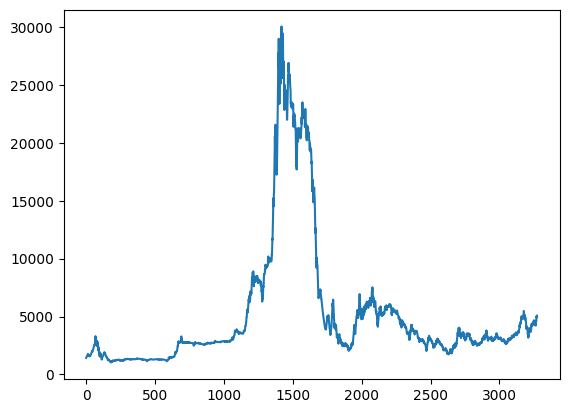

In [18]:
# visual training data
df_train['Close'].plot()
plt.show()

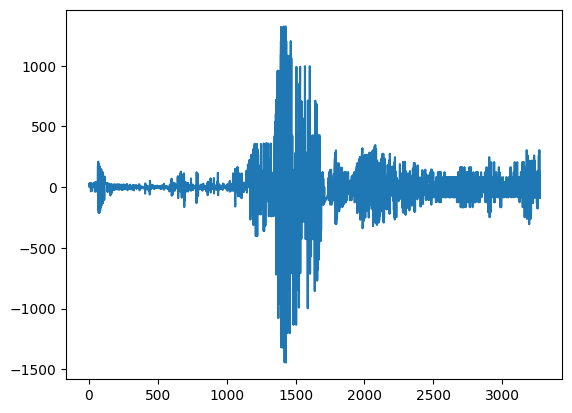

In [19]:
plt.plot(df_train['Close'].diff())

<function matplotlib.pyplot.show(close=None, block=None)>

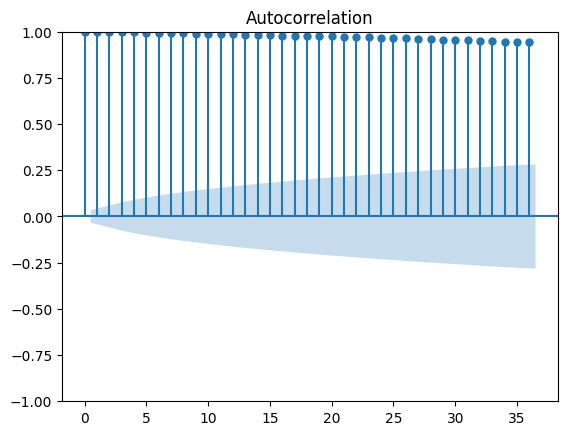

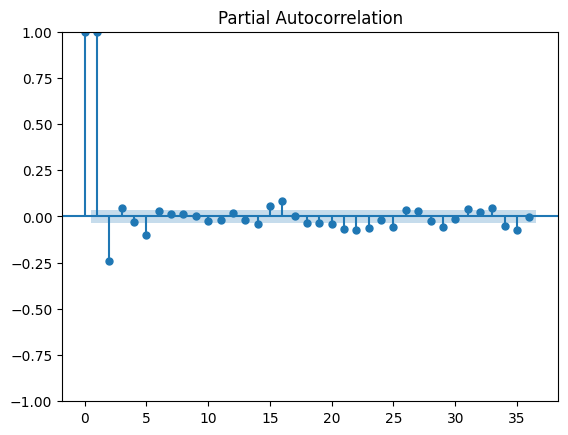

In [20]:
plot_acf(df_train['Close'])
plot_pacf(df_train['Close'])
plt.show

**ARIMA MODEL**

In [22]:
# Load data
df = pd.read_csv(path, index_col=0, delimiter='\t')
# Get training data (timely ordered since data is time-series)
n = int(len(df) * 0.6)
m = int(len(df) * 0.8)

Close=df['Close'].values
df_train, train_close = df.head(n), Close[:n]
df_validation, val_close = df[n:m], Close[n:m]
df_test, test_close = df[:m], Close[m:] 

In [23]:
history=[x for x in train_close]
preds=[]
for i in range(len(test_close)):
    model = ARIMA(history, order=(3, 1, 5))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred = output[0]
    preds.append(pred)
    history.append(test_close[i])

C:\Users\tango\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tango\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tango\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\tango\AppData\Local\Packages

In [24]:
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test_close, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 352.679


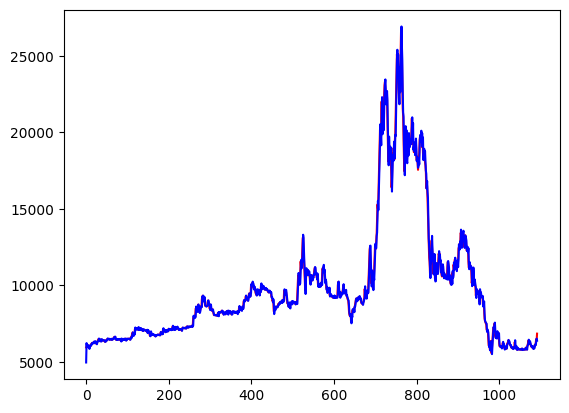

In [25]:
plt.plot(test_close, color='red')
plt.plot(preds, color='blue')
